In [3]:
import pandas as pd

In [10]:
stock_data = pd.read_csv('stock_data.csv',index_col = 0, parse_dates = ['Date'])
stockerbot = pd.read_csv('stockerbot.csv')

C:\Users\yaoli\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
stockerbot.sort_values(by = 'Date')

,Unnamed: 0,id,Date,source,symbols,dayofweek
40,26,967109381098758100,2018-02-23,benbernanke,FB,Fri
53,39,1016101380958744600,2018-07-08,1MinuteStock,IRM,Sun
41,27,1016082850326642700,2018-07-08,StockTipRobot,FIS,Sun
42,28,1016085297661120500,2018-07-08,ConsumerFeed,AJG,Sun
43,29,1016086242583351300,2018-07-08,MareaInformativ,AJG,Sun
...,...,...,...,...,...,...
34,20,1019734658127401000,2018-07-19,business,CBS,Thu
33,19,1019733841370669000,2018-07-19,TheEconomist,NTRS,Thu
32,18,1019733557646770200,2018-07-19,Reuters,ticker,Thu
37,23,1019741289473028100,2018-07-19,Reuters,EBAY,Thu


Since there is only one comment occurred in Febuary and the rest of comments all occurred between July 8th and July 19th, we will remove this row and only include data occurred in July for further exploration.

In [12]:
sd = stock_data[(stock_data['Date'] >= pd.to_datetime('2018-07-06')) & (stock_data['Date'] <= pd.to_datetime('2018-07-19'))]

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

# set the graphics style initially to defaul
plt.style.use('default')

In [14]:
sd.groupby(['Categories'])['source'].count()

Categories
Individual      20542
News Agency      6713
Organization     1022
Other               0
Name: source, dtype: int64

In [16]:
sd['abs'] = np.abs(sd['Percent_price_change'])
sd.head()

C:\Users\yaoli\AppData\Local\Temp/ipykernel_40860/639240268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd['abs'] = np.abs(sd['Percent_price_change'])


,Date,source,symbols,Close_today,Categories,Close_tomorrow,Percent_price_change,Day_of_week,Week_number,Month_number,abs
0,2018-07-18,GoldmanSachs,GS,231.240005,Individual,229.630005,-0.696247,2,29,7,0.696247
1,2018-07-18,StockTwits,M,37.700001,Individual,38.959999,3.342171,2,29,7,3.342171
2,2018-07-18,TheStreet,AIG,55.130001,Organization,53.849998,-2.321790,2,29,7,2.321790
3,2018-07-18,ThisLincolnian,AIG,55.130001,News Agency,53.849998,-2.321790,2,29,7,2.321790
4,2018-07-18,ConsumerFeed,AIG,55.130001,News Agency,53.849998,-2.321790,2,29,7,2.321790


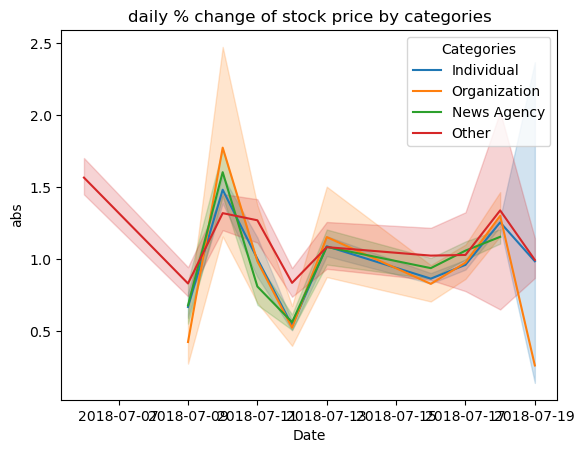

In [17]:
sns.lineplot(data=sd, x='Date', y='abs', hue='Categories').set_title('daily % change of stock price by categories')
plt.show()

In [18]:
# Find the stock price that nearly 0

px.scatter(sd[sd['Close_today'] < 1], x="Date", y="Close_today",hover_data=["symbols"])

In [19]:
# We can find that only COL that has price less than $1, thus we will examine the overall price for COL
fig = px.line(sd[sd['symbols'] == 'COL'], x="Date", y="Close_today")
fig.show()

In [20]:
# After doing the research, COL is about to delisted. Thus, we will exclude COL from the data for analysis
sd = sd[sd['symbols'] != 'COL']

##### Symbol counts by Categories

In [21]:
import plotly.graph_objects as go # for interactive plotting
import plotly.express as px

stock_data = pd.read_csv('stock_data.csv',index_col = 0, parse_dates = ['Date'])
sd = stock_data[(stock_data['Date'] >= pd.to_datetime('2018-07-06')) & (stock_data['Date'] <= pd.to_datetime('2018-07-19'))]
df = pd.DataFrame(sd.groupby(['Categories']).count())

fig = px.bar(df, x="symbols", y=df.index, orientation='h',
             height=400,
             title='Categories count')
fig.show()

C:\Users\yaoli\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.



#### Category counts by Week_number
##### group by week_number and categories

<AxesSubplot:xlabel='Week_number', ylabel='0'>

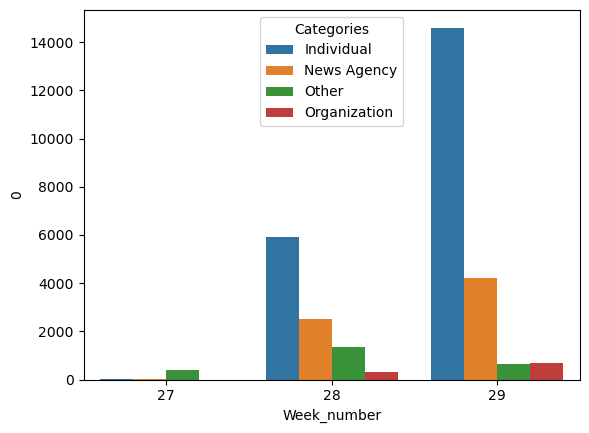

In [22]:
import seaborn as sns

df1 = pd.DataFrame(sd.groupby(['Week_number','Categories']).size()).reset_index()
sns.barplot(x='Week_number', y=0, hue='Categories', data=df1)

#### Prepare data to see the stock price change in percentage during the period

In [23]:
import numpy as np
sd['abs'] = np.abs(sd['Percent_price_change'])

C:\Users\yaoli\AppData\Local\Temp/ipykernel_40860/3092286858.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
df_ind = pd.DataFrame(sd[sd['Categories']=='Individual'])
df_news = pd.DataFrame(sd[sd['Categories']=='News Agency'].reset_index())
df_org = pd.DataFrame(sd[sd['Categories']=='Organization'].reset_index())
df_other = pd.DataFrame(sd[sd['Categories']=='Other'].reset_index())

#### Stock Price Change in % by Categories of Individual, News Agency, Organization, Other 

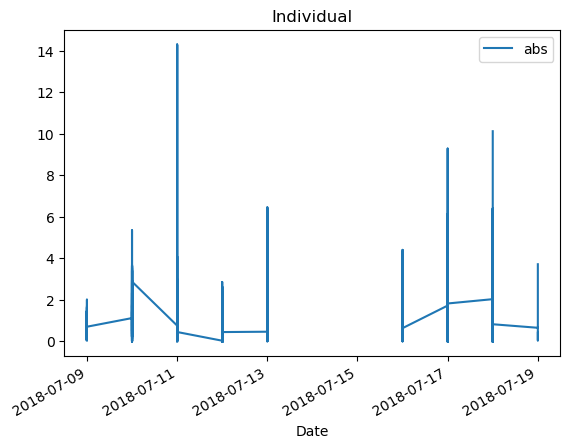

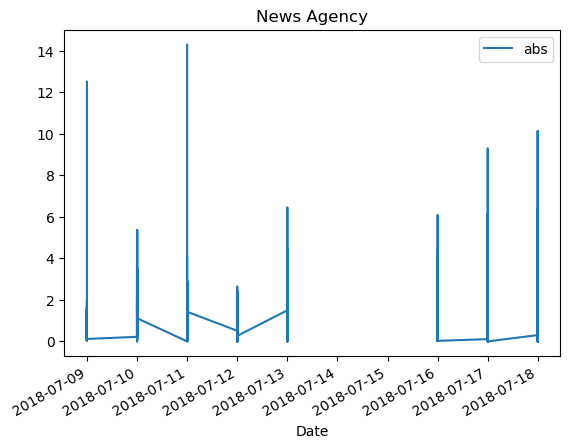

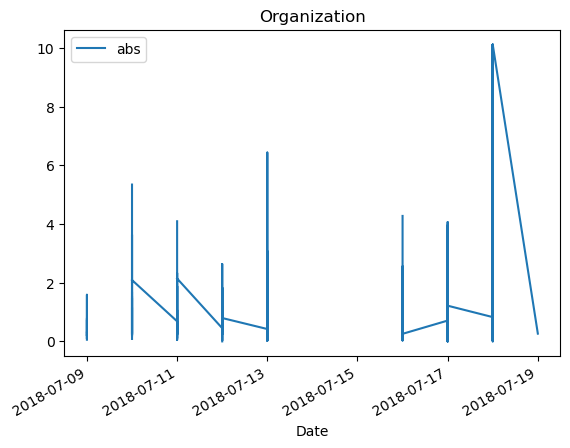

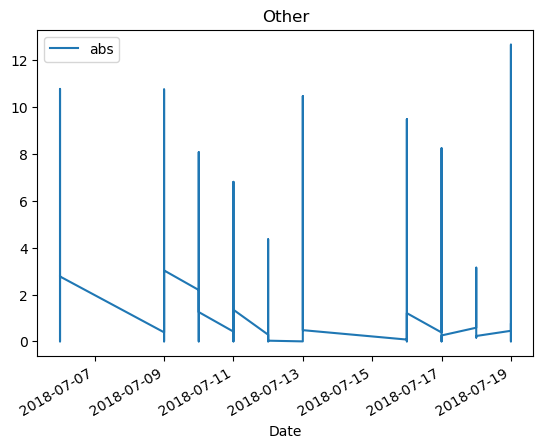

In [26]:

p1 = df_ind.plot.line(x='Date', y='abs').set_title('Individual')
p2 = df_news.plot.line(x='Date', y='abs').set_title('News Agency')
p3 = df_org.plot.line(x='Date', y='abs').set_title('Organization')
p4 = df_other.plot.line(x='Date', y='abs').set_title('Other')

## Prepare Data for analysis

In [27]:
# Adjusted Date for Sat. and Sun.

sd['Date_Adjusted'] = [d+pd.DateOffset(days=-1) if i == 5 else d+pd.DateOffset(days=-2) if i == 6 else d for i,d in zip(sd['Day_of_week'],sd['Date'])]

C:\Users\yaoli\AppData\Local\Temp/ipykernel_40860/2493468907.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
sd[sd['Day_of_week'].isin([5,6])].head()

,Date,source,symbols,Close_today,Categories,Close_tomorrow,Percent_price_change,Day_of_week,Week_number,Month_number,abs,Date_Adjusted
656,2018-07-08,StockTipRobot,FIS,NaN,News Agency,NaN,NaN,6,27,7,NaN,2018-07-06
657,2018-07-08,ConsumerFeed,AJG,NaN,News Agency,NaN,NaN,6,27,7,NaN,2018-07-06
658,2018-07-08,MareaInformativ,AJG,NaN,Individual,NaN,NaN,6,27,7,NaN,2018-07-06
659,2018-07-08,finzine,INFO,NaN,News Agency,NaN,NaN,6,27,7,NaN,2018-07-06
660,2018-07-08,Riskographer2,FLR,NaN,Individual,NaN,NaN,6,27,7,NaN,2018-07-06


In [29]:
# Count posted for each Date, Symbols, and Categories

count_post = pd.pivot_table(sd,values = 'source', index = ['Date_Adjusted','symbols','Categories'],aggfunc = 'count').reset_index()

count_post.columns = ['Date', 'symbols', 'Categories', 'count_post']

count_post.head()

,Date,symbols,Categories,count_post
0,2018-07-06,A,Other,0
1,2018-07-06,AAL,Other,0
2,2018-07-06,AAOI,Other,0
3,2018-07-06,AAP,Other,0
4,2018-07-06,AAPL,Other,0


In [30]:
# Exclude symbols that are not a stock

stock = pd.read_csv('stock_price.csv', index_col = 0)
stock = stock['symbols'].drop_duplicates().reset_index(drop = True)

stock.head()

0      GS
1       M
2     AIG
3    ORCL
4      FB
Name: symbols, dtype: object

In [31]:
count_post = count_post[count_post['symbols'].isin(stock)]

In [32]:
# Check Count

count_post['count_post'].sum()

24753

In [33]:
# Check Cat

count_post[count_post['count_post'] == 0]['Categories'].unique()

array(['Other'], dtype=object)

In [34]:
# Check stock

check = count_post.groupby('symbols')['Date'].nunique()

check[check != 10]

Series([], Name: Date, dtype: int64)

In [35]:
count_post['Date'].unique()

array(['2018-07-06T00:00:00.000000000', '2018-07-09T00:00:00.000000000',
       '2018-07-10T00:00:00.000000000', '2018-07-11T00:00:00.000000000',
       '2018-07-12T00:00:00.000000000', '2018-07-13T00:00:00.000000000',
       '2018-07-16T00:00:00.000000000', '2018-07-17T00:00:00.000000000',
       '2018-07-18T00:00:00.000000000', '2018-07-19T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [36]:
# Join with percentage

final_data = count_post.merge(sd[['Date','Percent_price_change','symbols','abs']].drop_duplicates(),on = ['Date','symbols'], how = 'left')


In [37]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5892 entries, 0 to 5891
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  5892 non-null   datetime64[ns]
 1   symbols               5892 non-null   object        
 2   Categories            5892 non-null   object        
 3   count_post            5892 non-null   int64         
 4   Percent_price_change  5892 non-null   float64       
 5   abs                   5892 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 322.2+ KB


In [38]:
count_post.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5892 entries, 0 to 6458
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5892 non-null   datetime64[ns]
 1   symbols     5892 non-null   object        
 2   Categories  5892 non-null   object        
 3   count_post  5892 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 230.2+ KB


In [39]:
final_data.to_csv('final_data.csv')

In [40]:
final_data[final_data['Percent_price_change'].isna()]

,Date,symbols,Categories,count_post,Percent_price_change,abs


In [41]:
px.scatter(final_data, x = 'count_post', y = 'Percent_price_change',hover_data=["symbols",'Date'], color = 'Categories')